In [32]:
from pathlib import Path
import pandas as pd
from typing import Union

def load_and_clean_ipc_data(file_path: Union[str, Path]) -> pd.DataFrame:
    """
    Load and clean the IPC Analysis Excel data.

    Args:
        file_path (Union[str, Path]): Path to the IPC Analysis Excel file.

    Returns:
        pd.DataFrame: Cleaned IPC DataFrame with flattened columns, parsed dates, and numeric types.

    Raises:
        FileNotFoundError: If the Excel file is not found at the given path.
    """
    path = Path(file_path)
    if not path.exists():
        raise FileNotFoundError(f"File not found: {path}")

    # Read the Excel file with multi-index header rows for columns
    df = pd.read_excel(path, header=[10, 11])

    # Flatten MultiIndex columns
    df.columns = [
        lvl1.strip() if 'Unnamed' in lvl0 else f"{lvl0.strip()}_{lvl1.strip()}"
        for lvl0, lvl1 in df.columns
    ]

    # Drop non-data rows (e.g., title rows without Area ID)
    df = df[df['Area ID'].notna()].reset_index(drop=True)

    # Parse the Date of Analysis column to datetime
    df['Date of Analysis'] = pd.to_datetime(df['Date of Analysis'], format='%b %Y')

    # Convert all numeric columns (# and %) to numeric dtype
    string_columns = ['Country', 'Level 1 Name', 'Area', 'Analysis Name']
    for col in df.columns:
        if col not in string_columns + ['Date of Analysis']:
            df[col] = pd.to_numeric(df[col], errors='coerce')

    return df

# Usage example
file_path = Path("/teamspace/studios/this_studio/somali-radios-with-ai-for-food-security/phase_1/data/Somalia - IPC Analysis 2017-2025.xlsx")
cleaned_df = load_and_clean_ipc_data(file_path)

# Display the first few rows and dtypes
print(cleaned_df.head())
print("\nData Types:\n", cleaned_df.dtypes)


   Country Level 1 Name             Area     Area ID  \
0  Somalia        Awdal             Baki  77294784.0   
1  Somalia        Awdal         Baki (1)  77295082.0   
2  Somalia        Awdal         Baki (2)  77294786.0   
3  Somalia        Awdal        Baki idps  77294744.0   
4  Somalia        Awdal  Baki idps rural  77294780.0   

                        Analysis Name Date of Analysis  Country Population  \
0  Acute Food Insecurity January 2025       2025-01-01                 NaN   
1  Acute Food Insecurity January 2025       2025-01-01                 NaN   
2  Acute Food Insecurity January 2025       2025-01-01                 NaN   
3  Acute Food Insecurity January 2025       2025-01-01                 NaN   
4  Acute Food Insecurity January 2025       2025-01-01                 NaN   

   Population Analysed_#  Population Analysed_% of total county Pop  \
0                49180.0                                        NaN   
1                 9221.0                            

In [33]:
cleaned_df

,Country,Level 1 Name,Area,Area ID,Analysis Name,Date of Analysis,Country Population,Population Analysed_#,Population Analysed_% of total county Pop,Population Analysed_Area Phase,...,Phase 2_#.2,Phase 2_%.2,Phase 3_#.2,Phase 3_%.2,Phase 4_#.2,Phase 4_%.2,Phase 5_#.2,Phase 5_%.2,Phase P3+_#.2,Phase P3+_%.2
0,Somalia,Awdal,Baki,77294784.0,Acute Food Insecurity January 2025,2025-01-01,NaN,49180.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Somalia,Awdal,Baki (1),77295082.0,Acute Food Insecurity January 2025,2025-01-01,NaN,9221.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Somalia,Awdal,Baki (2),77294786.0,Acute Food Insecurity January 2025,2025-01-01,NaN,3073.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Somalia,Awdal,Baki idps,77294744.0,Acute Food Insecurity January 2025,2025-01-01,NaN,2621.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Somalia,Awdal,Baki idps rural,77294780.0,Acute Food Insecurity January 2025,2025-01-01,NaN,2255.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3453,Somalia,Togdheer,Owdweyne,12693315.0,Acute Food Insecurity January 2017,2017-01-01,NaN,101358.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3454,Somalia,Togdheer,Sheikh,12693377.0,Acute Food Insecurity January 2017,2017-01-01,NaN,75904.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3455,Somalia,Woqooyi Galbeed,Berbera,12693318.0,Acute Food Insecurity January 2017,2017-01-01,NaN,176008.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3456,Somalia,Woqooyi Galbeed,Gebiley,12693366.0,Acute Food Insecurity January 2017,2017-01-01,NaN,106914.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
cleaned_df.columns

Index(['Country', 'Level 1 Name', 'Area', 'Area ID', 'Analysis Name',
       'Date of Analysis', 'Country Population', 'Population Analysed_#',
       'Population Analysed_% of total county Pop',
       'Population Analysed_Area Phase', 'Population Analysed_Analysis Period',
       'Phase 1_#', 'Phase 1_%', 'Phase 2_#', 'Phase 2_%', 'Phase 3_#',
       'Phase 3_%', 'Phase 4_#', 'Phase 4_%', 'Phase 5_#', 'Phase 5_%',
       'Phase P3+_#', 'Phase P3+_%', 'Population Analysed_#.1',
       'Population Analysed_% of total county Pop.1',
       'Population Analysed_Area Phase.1',
       'Population Analysed_Analysis Period.1', 'Phase 1_#.1', 'Phase 1_%.1',
       'Phase 2_#.1', 'Phase 2_%.1', 'Phase 3_#.1', 'Phase 3_%.1',
       'Phase 4_#.1', 'Phase 4_%.1', 'Phase 5_#.1', 'Phase 5_%.1',
       'Phase P3+_#.1', 'Phase P3+_%.1', 'Population Analysed_#.2',
       'Population Analysed_% of total county Pop.2',
       'Population Analysed_Area Phase.2',
       'Population Analysed_Analysis Perio

In [35]:
import pandas as pd
from typing import Literal


def filter_projection(
    df: pd.DataFrame,
    date: str = "2025-01-01",
    projection: Literal["current", "first", "second"] = "current",
) -> pd.DataFrame:
    """
    Filter the DataFrame for a specific analysis date and projection.

    Args:
        df (pd.DataFrame): 
            The full DataFrame containing the analysis data.
        date (str): 
            Analysis date in 'YYYY-MM-DD' format to filter on.
            Defaults to "2025-01-01".
        projection (str): 
            Which set of columns to return:
              - "current":    columns without suffixes (no .1 or .2)
              - "first":      columns ending in '.1'
              - "second":     columns ending in '.2'

    Returns:
        pd.DataFrame:
            A filtered DataFrame containing only the rows for `date` and
            the requested projection of columns.

    Raises:
        ValueError:
            If `projection` is not one of "current", "first", or "second".
    """
    # Always include these metadata columns
    meta_cols = [
        "Country",
        "Level 1 Name",
        "Area",
        "Area ID",
        "Analysis Name",
        "Date of Analysis",
        "Country Population",
    ]

    # Filter rows by date
    df_date = df[df["Date of Analysis"] == date]

    # Determine which columns to keep based on projection
    if projection == "current":
        # no .1 or .2 suffix
        data_cols = [
            col
            for col in df.columns
            if col not in meta_cols and not col.endswith(".1") and not col.endswith(".2")
        ]
    elif projection == "first":
        data_cols = [col for col in df.columns if col.endswith(".1")]
    elif projection == "second":
        data_cols = [col for col in df.columns if col.endswith(".2")]
    else:
        raise ValueError(
            f"Invalid projection '{projection}'; choose 'current', 'first', or 'second'."
        )

    # Return the subset DataFrame
    return df_date[meta_cols + data_cols]


In [38]:
# Assume df is your full DataFrame as shown
df_current = filter_projection(cleaned_df, date="2024-08-01")                 # defaults to 2025-01-01 & 'current'
# df_first    = filter_projection(df, projection="first")
# df_second   = filter_projection(df, date="2025-01-01", projection="second")


In [39]:
df_current

,Country,Level 1 Name,Area,Area ID,Analysis Name,Date of Analysis,Country Population,Population Analysed_#,Population Analysed_% of total county Pop,Population Analysed_Area Phase,...,Phase 2_#,Phase 2_%,Phase 3_#,Phase 3_%,Phase 4_#,Phase 4_%,Phase 5_#,Phase 5_%,Phase P3+_#,Phase P3+_%
355,Somalia,Awdal,Baki,69456211.0,Somalia IPC Post GU 2024,2024-08-01,NaN,47695.0,NaN,NaN,...,19080.0,0.40,4770.0,0.10,0.0,0.00,0.0,0.0,4770.0,0.10
356,Somalia,Awdal,Baki (1),69455997.0,Somalia IPC Post GU 2024,2024-08-01,NaN,8943.0,NaN,NaN,...,3130.0,0.35,1790.0,0.20,450.0,0.05,0.0,0.0,2240.0,0.25
357,Somalia,Awdal,Baki (2),69456446.0,Somalia IPC Post GU 2024,2024-08-01,NaN,2980.0,NaN,NaN,...,1040.0,0.35,450.0,0.15,0.0,0.00,0.0,0.0,450.0,0.15
358,Somalia,Awdal,Baki idps,69455842.0,Somalia IPC Post GU 2024,2024-08-01,NaN,2542.0,NaN,NaN,...,890.0,0.35,380.0,0.15,130.0,0.05,0.0,0.0,510.0,0.20
359,Somalia,Awdal,Baki idps rural,69456279.0,Somalia IPC Post GU 2024,2024-08-01,NaN,2187.0,NaN,NaN,...,770.0,0.35,330.0,0.15,110.0,0.05,0.0,0.0,440.0,0.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
705,Somalia,Woqooyi Galbeed,Hargeysa (1),69456406.0,Somalia IPC Post GU 2024,2024-08-01,NaN,198935.0,NaN,NaN,...,69630.0,0.35,39790.0,0.20,9950.0,0.05,0.0,0.0,49740.0,0.25
706,Somalia,Woqooyi Galbeed,Hargeysa (2),69456135.0,Somalia IPC Post GU 2024,2024-08-01,NaN,358081.0,NaN,NaN,...,143230.0,0.40,35810.0,0.10,0.0,0.00,0.0,0.0,35810.0,0.10
707,Somalia,Woqooyi Galbeed,Hargeysa IDPs,69455933.0,Somalia IPC Post GU 2024,2024-08-01,NaN,97188.0,NaN,NaN,...,24300.0,0.25,19440.0,0.20,9720.0,0.10,0.0,0.0,29160.0,0.30
708,Somalia,Woqooyi Galbeed,Hargeysa Urban,69455923.0,Somalia IPC Post GU 2024,2024-08-01,NaN,126424.0,NaN,NaN,...,50569.0,0.40,12642.0,0.10,6321.0,0.05,0.0,0.0,18963.0,0.15


visualize this on a map in a similar way as in here 

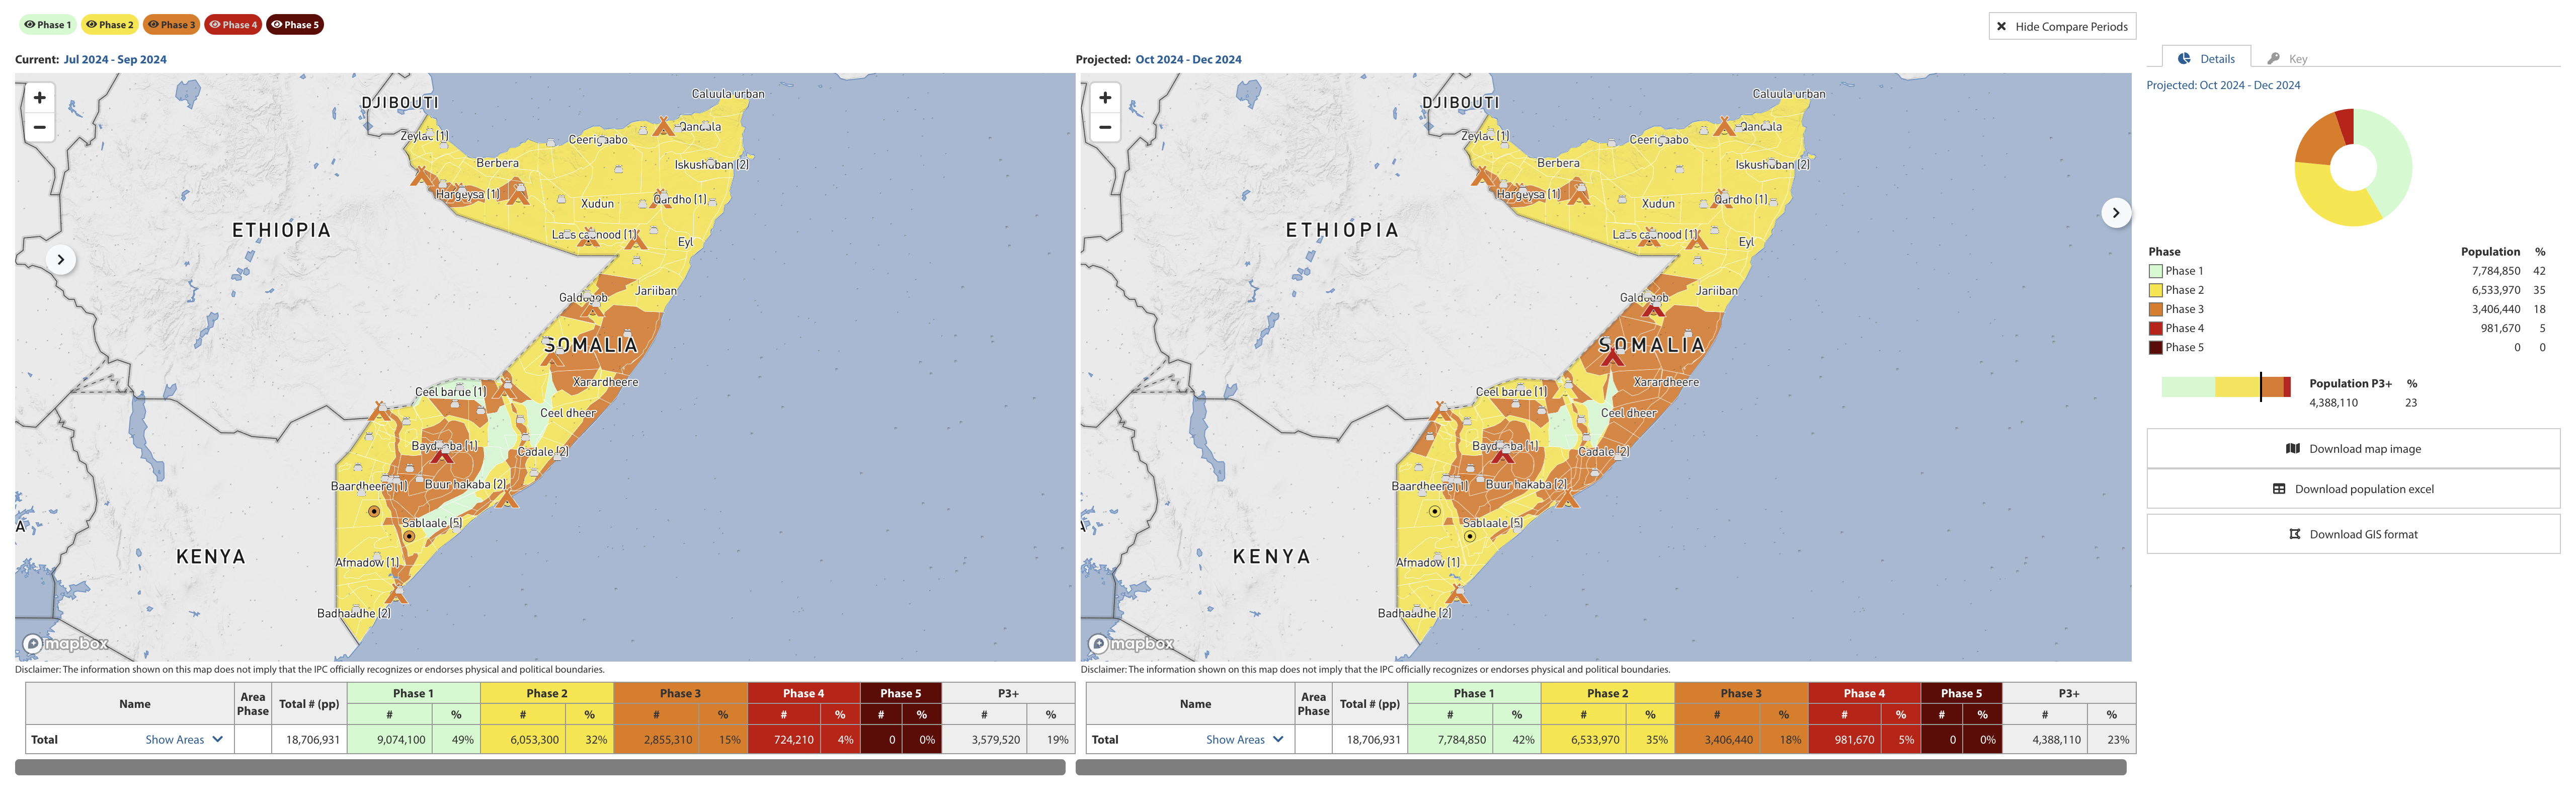